In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
from matplotlib.cm import get_cmap

plt.rcParams['text.usetex']=True


# Kuramoto Model(Mean Field)
$$\dot{\theta_i} = \omega_i - \frac{k}{N} \sum_{i=1}^{N} \sin{(\theta_j - \theta_i)} $$

In [64]:
def kuramoto(theta, T, dt, omega, k=0.5):
    N = len(theta)
    theta_full = np.zeros((T, N))
    theta_full[0] = theta

    for t in range(1, T):
        t0phase = theta_full[t - 1]
        phase_diff = t0phase[:, None] - t0phase[None, :]
        coupling = np.sum(np.sin(phase_diff), axis=1)
        t1phase = (t0phase + (omega + k * coupling) * dt) % (2 * np.pi)
        theta_full[t] = t1phase

    return theta_full

def KuramotoOrder(theta):
     return np.abs(np.mean(np.exp(1j*phase_arr), axis=1))

In [69]:

N = 10
T = 1000
dt = 0.05
b = .25
K = .5
theta = np.random.uniform(0, 2 * np.pi, N)
omega = np.random.normal(.3, .005)
phase_arr = kuramoto(theta, T, dt, omega, k=K)
r = KuramotoOrder(phase_arr)
time = np.linspace(0,T,T)

## Order Parameter


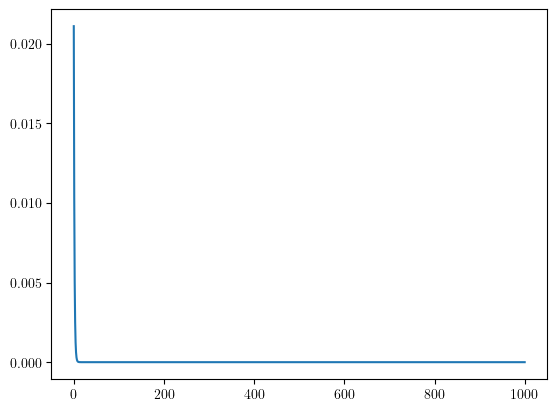

In [70]:
r = KuramotoOrder(phase_arr)
plt.plot(time,r)

## Animation


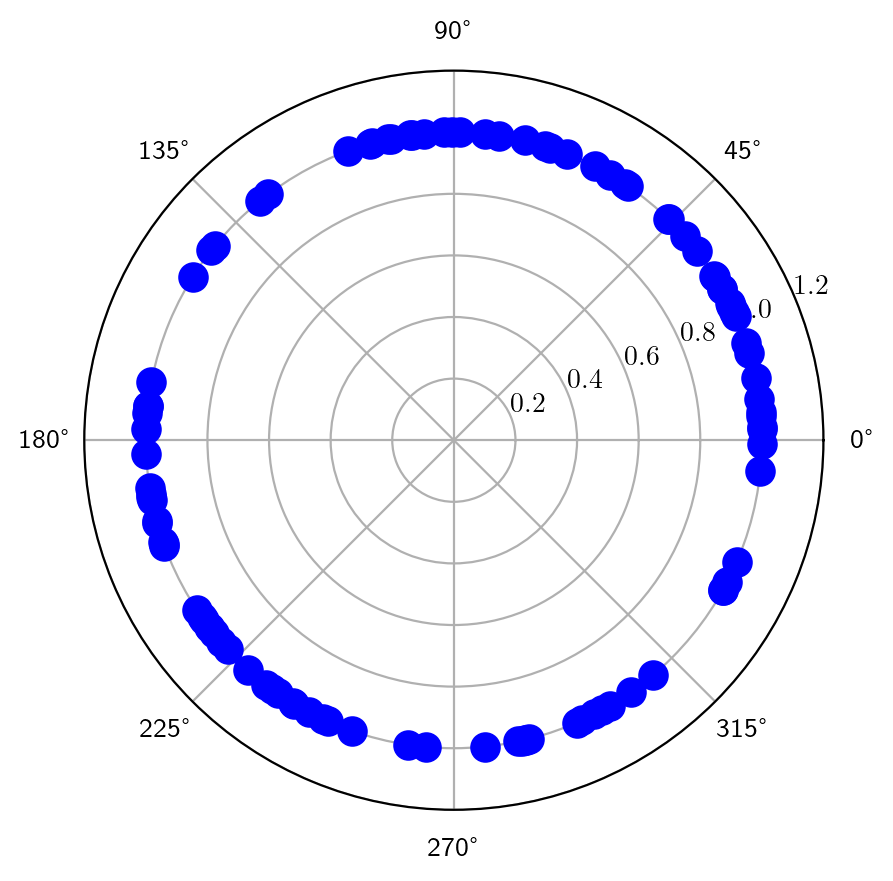

In [71]:
# Animation

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=200)
oscillator, = ax.plot([], [], 'o', markersize=10, color='blue')

def init():
    ax.set_ylim(0, 1.2)
    return oscillator,

def animate(i):
    phases = phase_arr[i]
    oscillator.set_data(phases, np.ones_like(phases))  # x: phases, y: radius
    return oscillator,

anim = FuncAnimation(
    fig, animate, init_func=init,
    frames=T, interval=50, blit=True
)

# Save animation
anim.save('kuramoto-oscillators.mp4', writer='ffmpeg', fps=24, dpi=200)

## Correlation

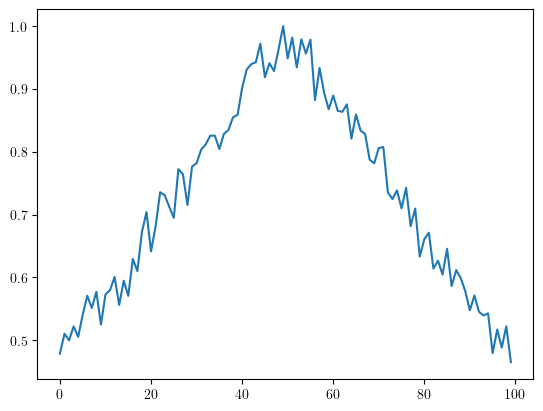

In [17]:
corr = np.correlate(phase_arr[:100,0], phase_arr[:100,4], mode='same')
corr /= np.max(corr)
plt.plot(corr)

# Phase Matrix Animation

In [20]:
x = 3.14159
print("%.2f" % x)  # Output: 3.14


3.14
